In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import datetime
import seaborn as sns

from matplotlib.lines import Line2D
%matplotlib inline

In [2]:
fp = r"..\input_data\NYPD_Motor_Vehicle_Collisions.dta"
collisions_df = pd.read_stata(fp)

In [3]:
collisions_df.head()

date  time        borough zipcode   latitude  longitude  \
0  09/24/2018  0:00  STATEN ISLAND   10306  40.573219 -74.106995   
1  09/24/2018  0:00                         40.612614 -74.076958   
2  09/24/2018  0:00                               NaN        NaN   
3  09/24/2018  0:00                         40.833981 -73.826347   
4  09/24/2018  0:05       BROOKLYN   11249  40.720074 -73.959846   

                 location                      onstreetname crossstreetname  \
0  (40.57322, -74.106995)  HYLAN BOULEVARD                      OTIS AVENUE   
1  (40.612614, -74.07696)  FLETCHER STREET                                    
2                                                                             
3   (40.83398, -73.82635)  BRUCKNER EXPRESSWAY                                
4  (40.720074, -73.95985)  WYTHE AVENUE                      NORTH 8 STREET   

                              offstreetname  ...  contributingfactorvehicle2  \
0                                            ...                 Unspecified   
1                                            ...                 Unspecified   
2  161-18    140 street                      ...                               
3                                            ...                 Unspecified   
4                                            ...                 Unspecified   

   contributingfactorvehicle3  contributingfactorvehicle4  \
0                                                           
1                                                           
2                                                           
3                                                           
4                                                           

   contributingfactorvehicle5  uniquekey                     vehicletypecode1  \
0                              3987045.0  Station Wagon/Sport Utility Vehicle   
1                              3987187.0  Station Wagon/Sport Utility Vehicle   
2                              3986792.0                                Sedan   
3                              3986861.0                                Sedan   
4                              3986532.0                                Sedan   

   vehicletypecode2  vehicletypecode3 vehicletypecode4 vehicletypecode5  
0             Sedan                                                      
1             Sedan                                                      
2                                                                        
3             Sedan                                                      
4             Sedan                                                      

[5 rows x 29 columns]

In [4]:
collisions_df.dtypes

date                           object
time                           object
borough                        object
zipcode                        object
latitude                      float32
longitude                     float32
location                       object
onstreetname                   object
crossstreetname                object
offstreetname                  object
numberofpersonsinjured        float64
numberofpersonskilled         float64
numberofpedestriansinjured    float64
numberofpedestrianskilled     float64
numberofcyclistinjured        float64
numberofcyclistkilled         float64
numberofmotoristinjured       float64
numberofmotoristkilled        float64
contributingfactorvehicle1     object
contributingfactorvehicle2     object
contributingfactorvehicle3     object
contributingfactorvehicle4     object
contributingfactorvehicle5     object
uniquekey                     float64
vehicletypecode1               object
vehicletypecode2               object
vehicletypec

In [5]:
collisions_df.head()

date  time        borough zipcode   latitude  longitude  \
0  09/24/2018  0:00  STATEN ISLAND   10306  40.573219 -74.106995   
1  09/24/2018  0:00                         40.612614 -74.076958   
2  09/24/2018  0:00                               NaN        NaN   
3  09/24/2018  0:00                         40.833981 -73.826347   
4  09/24/2018  0:05       BROOKLYN   11249  40.720074 -73.959846   

                 location                      onstreetname crossstreetname  \
0  (40.57322, -74.106995)  HYLAN BOULEVARD                      OTIS AVENUE   
1  (40.612614, -74.07696)  FLETCHER STREET                                    
2                                                                             
3   (40.83398, -73.82635)  BRUCKNER EXPRESSWAY                                
4  (40.720074, -73.95985)  WYTHE AVENUE                      NORTH 8 STREET   

                              offstreetname  ...  contributingfactorvehicle2  \
0                                            ...                 Unspecified   
1                                            ...                 Unspecified   
2  161-18    140 street                      ...                               
3                                            ...                 Unspecified   
4                                            ...                 Unspecified   

   contributingfactorvehicle3  contributingfactorvehicle4  \
0                                                           
1                                                           
2                                                           
3                                                           
4                                                           

   contributingfactorvehicle5  uniquekey                     vehicletypecode1  \
0                              3987045.0  Station Wagon/Sport Utility Vehicle   
1                              3987187.0  Station Wagon/Sport Utility Vehicle   
2                              3986792.0                                Sedan   
3                              3986861.0                                Sedan   
4                              3986532.0                                Sedan   

   vehicletypecode2  vehicletypecode3 vehicletypecode4 vehicletypecode5  
0             Sedan                                                      
1             Sedan                                                      
2                                                                        
3             Sedan                                                      
4             Sedan                                                      

[5 rows x 29 columns]

In [6]:
collisions_df['uniquekey'].nunique()

1351213

In [7]:
collisions_df.shape[0]

1351215

In [8]:
collisions_df.drop_duplicates(subset = 'uniquekey', keep = False, inplace=True)

In [9]:
collisions_df['uniquekey'].nunique()

1351213

In [10]:
collisions_df.shape[0]

1351213

In [11]:
# Making a copy of time
new = collisions_df['time'].copy()
collisions_df['datetime'] =collisions_df["date"].str.cat(new, sep =" ") 

In [12]:
collisions_df['timelen'] = collisions_df['time'].str.len()

In [13]:
collisions_df['timelen'].value_counts()

5    1011881
4     339332
Name: timelen, dtype: int64

In [14]:
collisions_df.index[collisions_df['timelen'] == 0].tolist()

[]

In [15]:
collisions_df = collisions_df.drop(collisions_df.index[collisions_df.index[collisions_df['timelen'] == 0].tolist()])

In [16]:
collisions_df.head()

date  time        borough zipcode   latitude  longitude  \
0  09/24/2018  0:00  STATEN ISLAND   10306  40.573219 -74.106995   
1  09/24/2018  0:00                         40.612614 -74.076958   
2  09/24/2018  0:00                               NaN        NaN   
3  09/24/2018  0:00                         40.833981 -73.826347   
4  09/24/2018  0:05       BROOKLYN   11249  40.720074 -73.959846   

                 location                      onstreetname crossstreetname  \
0  (40.57322, -74.106995)  HYLAN BOULEVARD                      OTIS AVENUE   
1  (40.612614, -74.07696)  FLETCHER STREET                                    
2                                                                             
3   (40.83398, -73.82635)  BRUCKNER EXPRESSWAY                                
4  (40.720074, -73.95985)  WYTHE AVENUE                      NORTH 8 STREET   

                              offstreetname  ...  contributingfactorvehicle4  \
0                                            ...                               
1                                            ...                               
2  161-18    140 street                      ...                               
3                                            ...                               
4                                            ...                               

   contributingfactorvehicle5  uniquekey                     vehicletypecode1  \
0                              3987045.0  Station Wagon/Sport Utility Vehicle   
1                              3987187.0  Station Wagon/Sport Utility Vehicle   
2                              3986792.0                                Sedan   
3                              3986861.0                                Sedan   
4                              3986532.0                                Sedan   

   vehicletypecode2  vehicletypecode3  vehicletypecode4  vehicletypecode5  \
0             Sedan                                                         
1             Sedan                                                         
2                                                                           
3             Sedan                                                         
4             Sedan                                                         

          datetime timelen  
0  09/24/2018 0:00       4  
1  09/24/2018 0:00       4  
2  09/24/2018 0:00       4  
3  09/24/2018 0:00       4  
4  09/24/2018 0:05       4  

[5 rows x 31 columns]

In [17]:
collisions_df['datetime_py'] = pd.to_datetime(collisions_df['datetime'], format= '%m/%d/%Y %H:%M')

In [18]:
collisions_df.head()

date  time        borough zipcode   latitude  longitude  \
0  09/24/2018  0:00  STATEN ISLAND   10306  40.573219 -74.106995   
1  09/24/2018  0:00                         40.612614 -74.076958   
2  09/24/2018  0:00                               NaN        NaN   
3  09/24/2018  0:00                         40.833981 -73.826347   
4  09/24/2018  0:05       BROOKLYN   11249  40.720074 -73.959846   

                 location                      onstreetname crossstreetname  \
0  (40.57322, -74.106995)  HYLAN BOULEVARD                      OTIS AVENUE   
1  (40.612614, -74.07696)  FLETCHER STREET                                    
2                                                                             
3   (40.83398, -73.82635)  BRUCKNER EXPRESSWAY                                
4  (40.720074, -73.95985)  WYTHE AVENUE                      NORTH 8 STREET   

                              offstreetname  ...  contributingfactorvehicle5  \
0                                            ...                               
1                                            ...                               
2  161-18    140 street                      ...                               
3                                            ...                               
4                                            ...                               

   uniquekey                     vehicletypecode1  vehicletypecode2  \
0  3987045.0  Station Wagon/Sport Utility Vehicle             Sedan   
1  3987187.0  Station Wagon/Sport Utility Vehicle             Sedan   
2  3986792.0                                Sedan                     
3  3986861.0                                Sedan             Sedan   
4  3986532.0                                Sedan             Sedan   

   vehicletypecode3  vehicletypecode4  vehicletypecode5         datetime  \
0                                                        09/24/2018 0:00   
1                                                        09/24/2018 0:00   
2                                                        09/24/2018 0:00   
3                                                        09/24/2018 0:00   
4                                                        09/24/2018 0:05   

  timelen         datetime_py  
0       4 2018-09-24 00:00:00  
1       4 2018-09-24 00:00:00  
2       4 2018-09-24 00:00:00  
3       4 2018-09-24 00:00:00  
4       4 2018-09-24 00:05:00  

[5 rows x 32 columns]

In [19]:
collisions_df['time_py'] = pd.to_datetime(collisions_df['time'], format= '%H:%M' ).dt.time

In [20]:
collisions_df[['time_py','time']].tail()

time_py  time
1351210  09:45:00  9:45
1351211  09:50:00  9:50
1351212  09:50:00  9:50
1351213  09:57:00  9:57
1351214  09:59:00  9:59

## Collapse the data into outcomes per day

In [21]:
collisions_df['count'] = 1

source1: https://www.interviewqs.com/ddi_code_snippets/select_pandas_dataframe_rows_between_two_dates <br>
source2: https://datatofish.com/if-condition-in-pandas-dataframe/

Set the index to datetime

In [22]:
collisions_df = collisions_df.set_index('datetime_py')

In [23]:
collisions_df.tail()

date  time    borough zipcode   latitude  \
datetime_py                                                           
2012-07-01 09:45:00  07/01/2012  9:45                           NaN   
2012-07-01 09:50:00  07/01/2012  9:50  MANHATTAN   10019  40.766777   
2012-07-01 09:50:00  07/01/2012  9:50     QUEENS   11001  40.736244   
2012-07-01 09:57:00  07/01/2012  9:57  MANHATTAN   10065  40.765244   
2012-07-01 09:59:00  07/01/2012  9:59      BRONX   10452  40.835396   

                     longitude                   location  \
datetime_py                                                 
2012-07-01 09:45:00        NaN                              
2012-07-01 09:50:00 -73.996765  (40.7667789, -73.9967618)   
2012-07-01 09:50:00 -73.702965  (40.7362448, -73.7029656)   
2012-07-01 09:57:00 -73.957870  (40.7652424, -73.9578679)   
2012-07-01 09:59:00 -73.920303    (40.835397, -73.920305)   

                                         onstreetname  \
datetime_py                                             
2012-07-01 09:45:00                                     
2012-07-01 09:50:00  WEST SIDE HIGHWAY                  
2012-07-01 09:50:00  265 STREET                         
2012-07-01 09:57:00  1 AVENUE                           
2012-07-01 09:59:00  EAST 167 STREET                    

                                      crossstreetname offstreetname  ...  \
datetime_py                                                          ...   
2012-07-01 09:45:00                                                  ...   
2012-07-01 09:50:00  WEST 50 STREET                                  ...   
2012-07-01 09:50:00  85 AVENUE                                       ...   
2012-07-01 09:57:00  EAST 68 STREET                                  ...   
2012-07-01 09:59:00  GERARD AVENUE                                   ...   

                     uniquekey   vehicletypecode1  \
datetime_py                                         
2012-07-01 09:45:00  2896726.0  PASSENGER VEHICLE   
2012-07-01 09:50:00    37635.0                VAN   
2012-07-01 09:50:00   219395.0  PASSENGER VEHICLE   
2012-07-01 09:57:00    44907.0  PASSENGER VEHICLE   
2012-07-01 09:59:00    85154.0  PASSENGER VEHICLE   

                                  vehicletypecode2  vehicletypecode3  \
datetime_py                                                            
2012-07-01 09:45:00                        UNKNOWN                     
2012-07-01 09:50:00  SPORT UTILITY / STATION WAGON                     
2012-07-01 09:50:00  SPORT UTILITY / STATION WAGON                     
2012-07-01 09:57:00                           TAXI                     
2012-07-01 09:59:00  SPORT UTILITY / STATION WAGON                     

                     vehicletypecode4  vehicletypecode5         datetime  \
datetime_py                                                                
2012-07-01 09:45:00                                      07/01/2012 9:45   
2012-07-01 09:50:00                                      07/01/2012 9:50   
2012-07-01 09:50:00                                      07/01/2012 9:50   
2012-07-01 09:57:00                                      07/01/2012 9:57   
2012-07-01 09:59:00                                      07/01/2012 9:59   

                     timelen   time_py count  
datetime_py                                   
2012-07-01 09:45:00        4  09:45:00     1  
2012-07-01 09:50:00        4  09:50:00     1  
2012-07-01 09:50:00        4  09:50:00     1  
2012-07-01 09:57:00        4  09:57:00     1  
2012-07-01 09:59:00        4  09:59:00     1  

[5 rows x 33 columns]

In [24]:
latenight_df = pd.DataFrame(collisions_df.between_time('23:00:00', '04:59:59'))

In [25]:
collisions_df['uniquekey'].nunique()

1351213

In [26]:
collisions_df.shape[0]

1351213

In [27]:
collisions_df.shape[1]

33

In [28]:
collisions_df1 = pd.merge(collisions_df,latenight_df[['uniquekey']], how='left', on = 'uniquekey', indicator = True, validate='1:1')

In [29]:
collisions_df1.shape[0]

1351213

In [30]:
collisions_df1.shape[1]

34

In [31]:
collisions_df1.head()

date  time        borough zipcode   latitude  longitude  \
0  09/24/2018  0:00  STATEN ISLAND   10306  40.573219 -74.106995   
1  09/24/2018  0:00                         40.612614 -74.076958   
2  09/24/2018  0:00                               NaN        NaN   
3  09/24/2018  0:00                         40.833981 -73.826347   
4  09/24/2018  0:05       BROOKLYN   11249  40.720074 -73.959846   

                 location                      onstreetname crossstreetname  \
0  (40.57322, -74.106995)  HYLAN BOULEVARD                      OTIS AVENUE   
1  (40.612614, -74.07696)  FLETCHER STREET                                    
2                                                                             
3   (40.83398, -73.82635)  BRUCKNER EXPRESSWAY                                
4  (40.720074, -73.95985)  WYTHE AVENUE                      NORTH 8 STREET   

                              offstreetname  ...  \
0                                            ...   
1                                            ...   
2  161-18    140 street                      ...   
3                                            ...   
4                                            ...   

                      vehicletypecode1  vehicletypecode2  vehicletypecode3  \
0  Station Wagon/Sport Utility Vehicle             Sedan                     
1  Station Wagon/Sport Utility Vehicle             Sedan                     
2                                Sedan                                       
3                                Sedan             Sedan                     
4                                Sedan             Sedan                     

   vehicletypecode4  vehicletypecode5         datetime  timelen   time_py  \
0                                      09/24/2018 0:00        4  00:00:00   
1                                      09/24/2018 0:00        4  00:00:00   
2                                      09/24/2018 0:00        4  00:00:00   
3                                      09/24/2018 0:00        4  00:00:00   
4                                      09/24/2018 0:05        4  00:05:00   

  count _merge  
0     1   both  
1     1   both  
2     1   both  
3     1   both  
4     1   both  

[5 rows x 34 columns]

In [32]:
collisions_df1['_merge'].value_counts()

left_only     1211546
both           139667
right_only          0
Name: _merge, dtype: int64

In [33]:
collisions_df1['latenight'] = np.where(collisions_df1['_merge']=='both', '1', '0')

In [34]:
collisions_df1['latenight'].dtypes

dtype('O')

Convert to int

In [35]:
collisions_df1['latenight'] = collisions_df1['latenight'].astype(int)

In [36]:
collisions_df1['latenight'].value_counts()

0    1211546
1     139667
Name: latenight, dtype: int64

In [37]:
collisions_df1['nonlatenight'] = 1-collisions_df1['latenight']

In [38]:
collisions_df1['nonlatenight'].value_counts()

1    1211546
0     139667
Name: nonlatenight, dtype: int64

In [39]:
collisions_df1['nonlatenight_count'] = np.multiply(collisions_df1['nonlatenight'],collisions_df['count'])
collisions_df1['nonlatenight_personsinjured'] = np.multiply(collisions_df1['nonlatenight'],collisions_df['numberofpersonsinjured'])
collisions_df1['nonlatenight_pedestriansinjured'] = np.multiply(collisions_df1['nonlatenight'],collisions_df['numberofpedestriansinjured'])
collisions_df1['nonlatenight_cyclistinjured'] = np.multiply(collisions_df1['nonlatenight'],collisions_df['numberofcyclistinjured'])
collisions_df1['nonlatenight_motoristinjured'] = np.multiply(collisions_df1['nonlatenight'],collisions_df['numberofmotoristinjured'])

In [40]:
collisions_df1['latenight_count'] = np.multiply(collisions_df1['latenight'],collisions_df['count'])
collisions_df1['latenight_personsinjured'] = np.multiply(collisions_df1['latenight'],collisions_df['numberofpersonsinjured'])
collisions_df1['latenight_pedestriansinjured'] = np.multiply(collisions_df1['latenight'],collisions_df['numberofpedestriansinjured'])
collisions_df1['latenight_cyclistinjured'] = np.multiply(collisions_df1['latenight'],collisions_df['numberofcyclistinjured'])
collisions_df1['latenight_motoristinjured'] = np.multiply(collisions_df1['latenight'],collisions_df['numberofmotoristinjured'])

In [41]:
collapsed_collisions_df = pd.DataFrame(collisions_df1.groupby('date').agg({
    'count': sum, # sum number of collisions per day
    'numberofpersonsinjured': sum,
    'numberofpedestriansinjured': sum,
    'numberofcyclistinjured': sum,
    'numberofmotoristinjured': sum,
    'nonlatenight_count': sum, # sum number of collisions per day
    'nonlatenight_personsinjured': sum,
    'nonlatenight_pedestriansinjured': sum,
    'nonlatenight_cyclistinjured': sum,
    'nonlatenight_motoristinjured': sum,    
    'latenight_count': sum, # sum number of collisions per day
    'latenight_personsinjured': sum,
    'latenight_pedestriansinjured': sum,
    'latenight_cyclistinjured': sum,
    'latenight_motoristinjured': sum,  
})).reset_index()

In [42]:
collapsed_collisions_df.head()

date  count  numberofpersonsinjured  numberofpedestriansinjured  \
0  01/01/2013    381                   157.0                        34.0   
1  01/01/2014    399                   165.0                        24.0   
2  01/01/2015    395                   130.0                        16.0   
3  01/01/2016    394                   124.0                        13.0   
4  01/01/2017    483                   167.0                        25.0   

   numberofcyclistinjured  numberofmotoristinjured  nonlatenight_count  \
0                     3.0                    120.0                 266   
1                     2.0                    139.0                 292   
2                     1.0                    113.0                 274   
3                     5.0                    107.0                 280   
4                     6.0                    140.0                 322   

   nonlatenight_personsinjured  nonlatenight_pedestriansinjured  \
0                         94.0                             15.0   
1                         93.0                             18.0   
2                         88.0                             13.0   
3                         83.0                              7.0   
4                        113.0                             14.0   

   nonlatenight_cyclistinjured  nonlatenight_motoristinjured  latenight_count  \
0                          2.0                          77.0              115   
1                          2.0                          73.0              107   
2                          0.0                          75.0              121   
3                          2.0                          74.0              114   
4                          5.0                          98.0              161   

   latenight_personsinjured  latenight_pedestriansinjured  \
0                      63.0                          19.0   
1                      72.0                           6.0   
2                      42.0                           3.0   
3                      41.0                           6.0   
4                      54.0                          11.0   

   latenight_cyclistinjured  latenight_motoristinjured  
0                       1.0                       43.0  
1                       0.0                       66.0  
2                       1.0                       38.0  
3                       3.0                       33.0  
4                       1.0                       42.0

In [43]:
collapsed_collisions_df = collapsed_collisions_df.drop(collapsed_collisions_df.index[0])

In [44]:
collapsed_collisions_df['datelen'] = collapsed_collisions_df['date'].str.len()

In [45]:
collapsed_collisions_df['datelen'].value_counts()

10    2276
Name: datelen, dtype: int64

In [46]:
collapsed_collisions_df.dtypes

date                                object
count                                int64
numberofpersonsinjured             float64
numberofpedestriansinjured         float64
numberofcyclistinjured             float64
numberofmotoristinjured            float64
nonlatenight_count                   int64
nonlatenight_personsinjured        float64
nonlatenight_pedestriansinjured    float64
nonlatenight_cyclistinjured        float64
nonlatenight_motoristinjured       float64
latenight_count                      int64
latenight_personsinjured           float64
latenight_pedestriansinjured       float64
latenight_cyclistinjured           float64
latenight_motoristinjured          float64
datelen                              int64
dtype: object

## Format the date variable

In [47]:
collapsed_collisions_df['date_py'] = pd.to_datetime(collapsed_collisions_df['date'], format='%m/%d/%Y')

In [48]:
collapsed_collisions_df.head()

date  count  numberofpersonsinjured  numberofpedestriansinjured  \
1  01/01/2014    399                   165.0                        24.0   
2  01/01/2015    395                   130.0                        16.0   
3  01/01/2016    394                   124.0                        13.0   
4  01/01/2017    483                   167.0                        25.0   
5  01/01/2018    443                   120.0                        12.0   

   numberofcyclistinjured  numberofmotoristinjured  nonlatenight_count  \
1                     2.0                    139.0                 292   
2                     1.0                    113.0                 274   
3                     5.0                    107.0                 280   
4                     6.0                    140.0                 322   
5                     3.0                    105.0                 308   

   nonlatenight_personsinjured  nonlatenight_pedestriansinjured  \
1                         93.0                             18.0   
2                         88.0                             13.0   
3                         83.0                              7.0   
4                        113.0                             14.0   
5                         80.0                             10.0   

   nonlatenight_cyclistinjured  nonlatenight_motoristinjured  latenight_count  \
1                          2.0                          73.0              107   
2                          0.0                          75.0              121   
3                          2.0                          74.0              114   
4                          5.0                          98.0              161   
5                          2.0                          68.0              135   

   latenight_personsinjured  latenight_pedestriansinjured  \
1                      72.0                           6.0   
2                      42.0                           3.0   
3                      41.0                           6.0   
4                      54.0                          11.0   
5                      40.0                           2.0   

   latenight_cyclistinjured  latenight_motoristinjured  datelen    date_py  
1                       0.0                       66.0       10 2014-01-01  
2                       1.0                       38.0       10 2015-01-01  
3                       3.0                       33.0       10 2016-01-01  
4                       1.0                       42.0       10 2017-01-01  
5                       1.0                       37.0       10 2018-01-01

Set date_py as the index

In [49]:
collapsed_collisions_df = collapsed_collisions_df.set_index('date_py')

In [50]:
collapsed_collisions_df.head()

date  count  numberofpersonsinjured  \
date_py                                                 
2014-01-01  01/01/2014    399                   165.0   
2015-01-01  01/01/2015    395                   130.0   
2016-01-01  01/01/2016    394                   124.0   
2017-01-01  01/01/2017    483                   167.0   
2018-01-01  01/01/2018    443                   120.0   

            numberofpedestriansinjured  numberofcyclistinjured  \
date_py                                                          
2014-01-01                        24.0                     2.0   
2015-01-01                        16.0                     1.0   
2016-01-01                        13.0                     5.0   
2017-01-01                        25.0                     6.0   
2018-01-01                        12.0                     3.0   

            numberofmotoristinjured  nonlatenight_count  \
date_py                                                   
2014-01-01                    139.0                 292   
2015-01-01                    113.0                 274   
2016-01-01                    107.0                 280   
2017-01-01                    140.0                 322   
2018-01-01                    105.0                 308   

            nonlatenight_personsinjured  nonlatenight_pedestriansinjured  \
date_py                                                                    
2014-01-01                         93.0                             18.0   
2015-01-01                         88.0                             13.0   
2016-01-01                         83.0                              7.0   
2017-01-01                        113.0                             14.0   
2018-01-01                         80.0                             10.0   

            nonlatenight_cyclistinjured  nonlatenight_motoristinjured  \
date_py                                                                 
2014-01-01                          2.0                          73.0   
2015-01-01                          0.0                          75.0   
2016-01-01                          2.0                          74.0   
2017-01-01                          5.0                          98.0   
2018-01-01                          2.0                          68.0   

            latenight_count  latenight_personsinjured  \
date_py                                                 
2014-01-01              107                      72.0   
2015-01-01              121                      42.0   
2016-01-01              114                      41.0   
2017-01-01              161                      54.0   
2018-01-01              135                      40.0   

            latenight_pedestriansinjured  latenight_cyclistinjured  \
date_py                                                              
2014-01-01                           6.0                       0.0   
2015-01-01                           3.0                       1.0   
2016-01-01                           6.0                       3.0   
2017-01-01                          11.0                       1.0   
2018-01-01                           2.0                       1.0   

            latenight_motoristinjured  datelen  
date_py                                         
2014-01-01                       66.0       10  
2015-01-01                       38.0       10  
2016-01-01                       33.0       10  
2017-01-01                       42.0       10  
2018-01-01                       37.0       10

In [51]:
collapsed_collisions_df['year'] = collapsed_collisions_df.index.year
collapsed_collisions_df['quarter'] = collapsed_collisions_df.index.quarter
collapsed_collisions_df['month'] = collapsed_collisions_df.index.month
collapsed_collisions_df['weekdayname'] = collapsed_collisions_df.index.weekday_name

In [52]:
collapsed_collisions_df.head()

date  count  numberofpersonsinjured  \
date_py                                                 
2014-01-01  01/01/2014    399                   165.0   
2015-01-01  01/01/2015    395                   130.0   
2016-01-01  01/01/2016    394                   124.0   
2017-01-01  01/01/2017    483                   167.0   
2018-01-01  01/01/2018    443                   120.0   

            numberofpedestriansinjured  numberofcyclistinjured  \
date_py                                                          
2014-01-01                        24.0                     2.0   
2015-01-01                        16.0                     1.0   
2016-01-01                        13.0                     5.0   
2017-01-01                        25.0                     6.0   
2018-01-01                        12.0                     3.0   

            numberofmotoristinjured  nonlatenight_count  \
date_py                                                   
2014-01-01                    139.0                 292   
2015-01-01                    113.0                 274   
2016-01-01                    107.0                 280   
2017-01-01                    140.0                 322   
2018-01-01                    105.0                 308   

            nonlatenight_personsinjured  nonlatenight_pedestriansinjured  \
date_py                                                                    
2014-01-01                         93.0                             18.0   
2015-01-01                         88.0                             13.0   
2016-01-01                         83.0                              7.0   
2017-01-01                        113.0                             14.0   
2018-01-01                         80.0                             10.0   

            nonlatenight_cyclistinjured  ...  latenight_count  \
date_py                                  ...                    
2014-01-01                          2.0  ...              107   
2015-01-01                          0.0  ...              121   
2016-01-01                          2.0  ...              114   
2017-01-01                          5.0  ...              161   
2018-01-01                          2.0  ...              135   

            latenight_personsinjured  latenight_pedestriansinjured  \
date_py                                                              
2014-01-01                      72.0                           6.0   
2015-01-01                      42.0                           3.0   
2016-01-01                      41.0                           6.0   
2017-01-01                      54.0                          11.0   
2018-01-01                      40.0                           2.0   

            latenight_cyclistinjured  latenight_motoristinjured  datelen  \
date_py                                                                    
2014-01-01                       0.0                       66.0       10   
2015-01-01                       1.0                       38.0       10   
2016-01-01                       3.0                       33.0       10   
2017-01-01                       1.0                       42.0       10   
2018-01-01                       1.0                       37.0       10   

            year  quarter  month  weekdayname  
date_py                                        
2014-01-01  2014        1      1    Wednesday  
2015-01-01  2015        1      1     Thursday  
2016-01-01  2016        1      1       Friday  
2017-01-01  2017        1      1       Sunday  
2018-01-01  2018        1      1       Monday  

[5 rows x 21 columns]

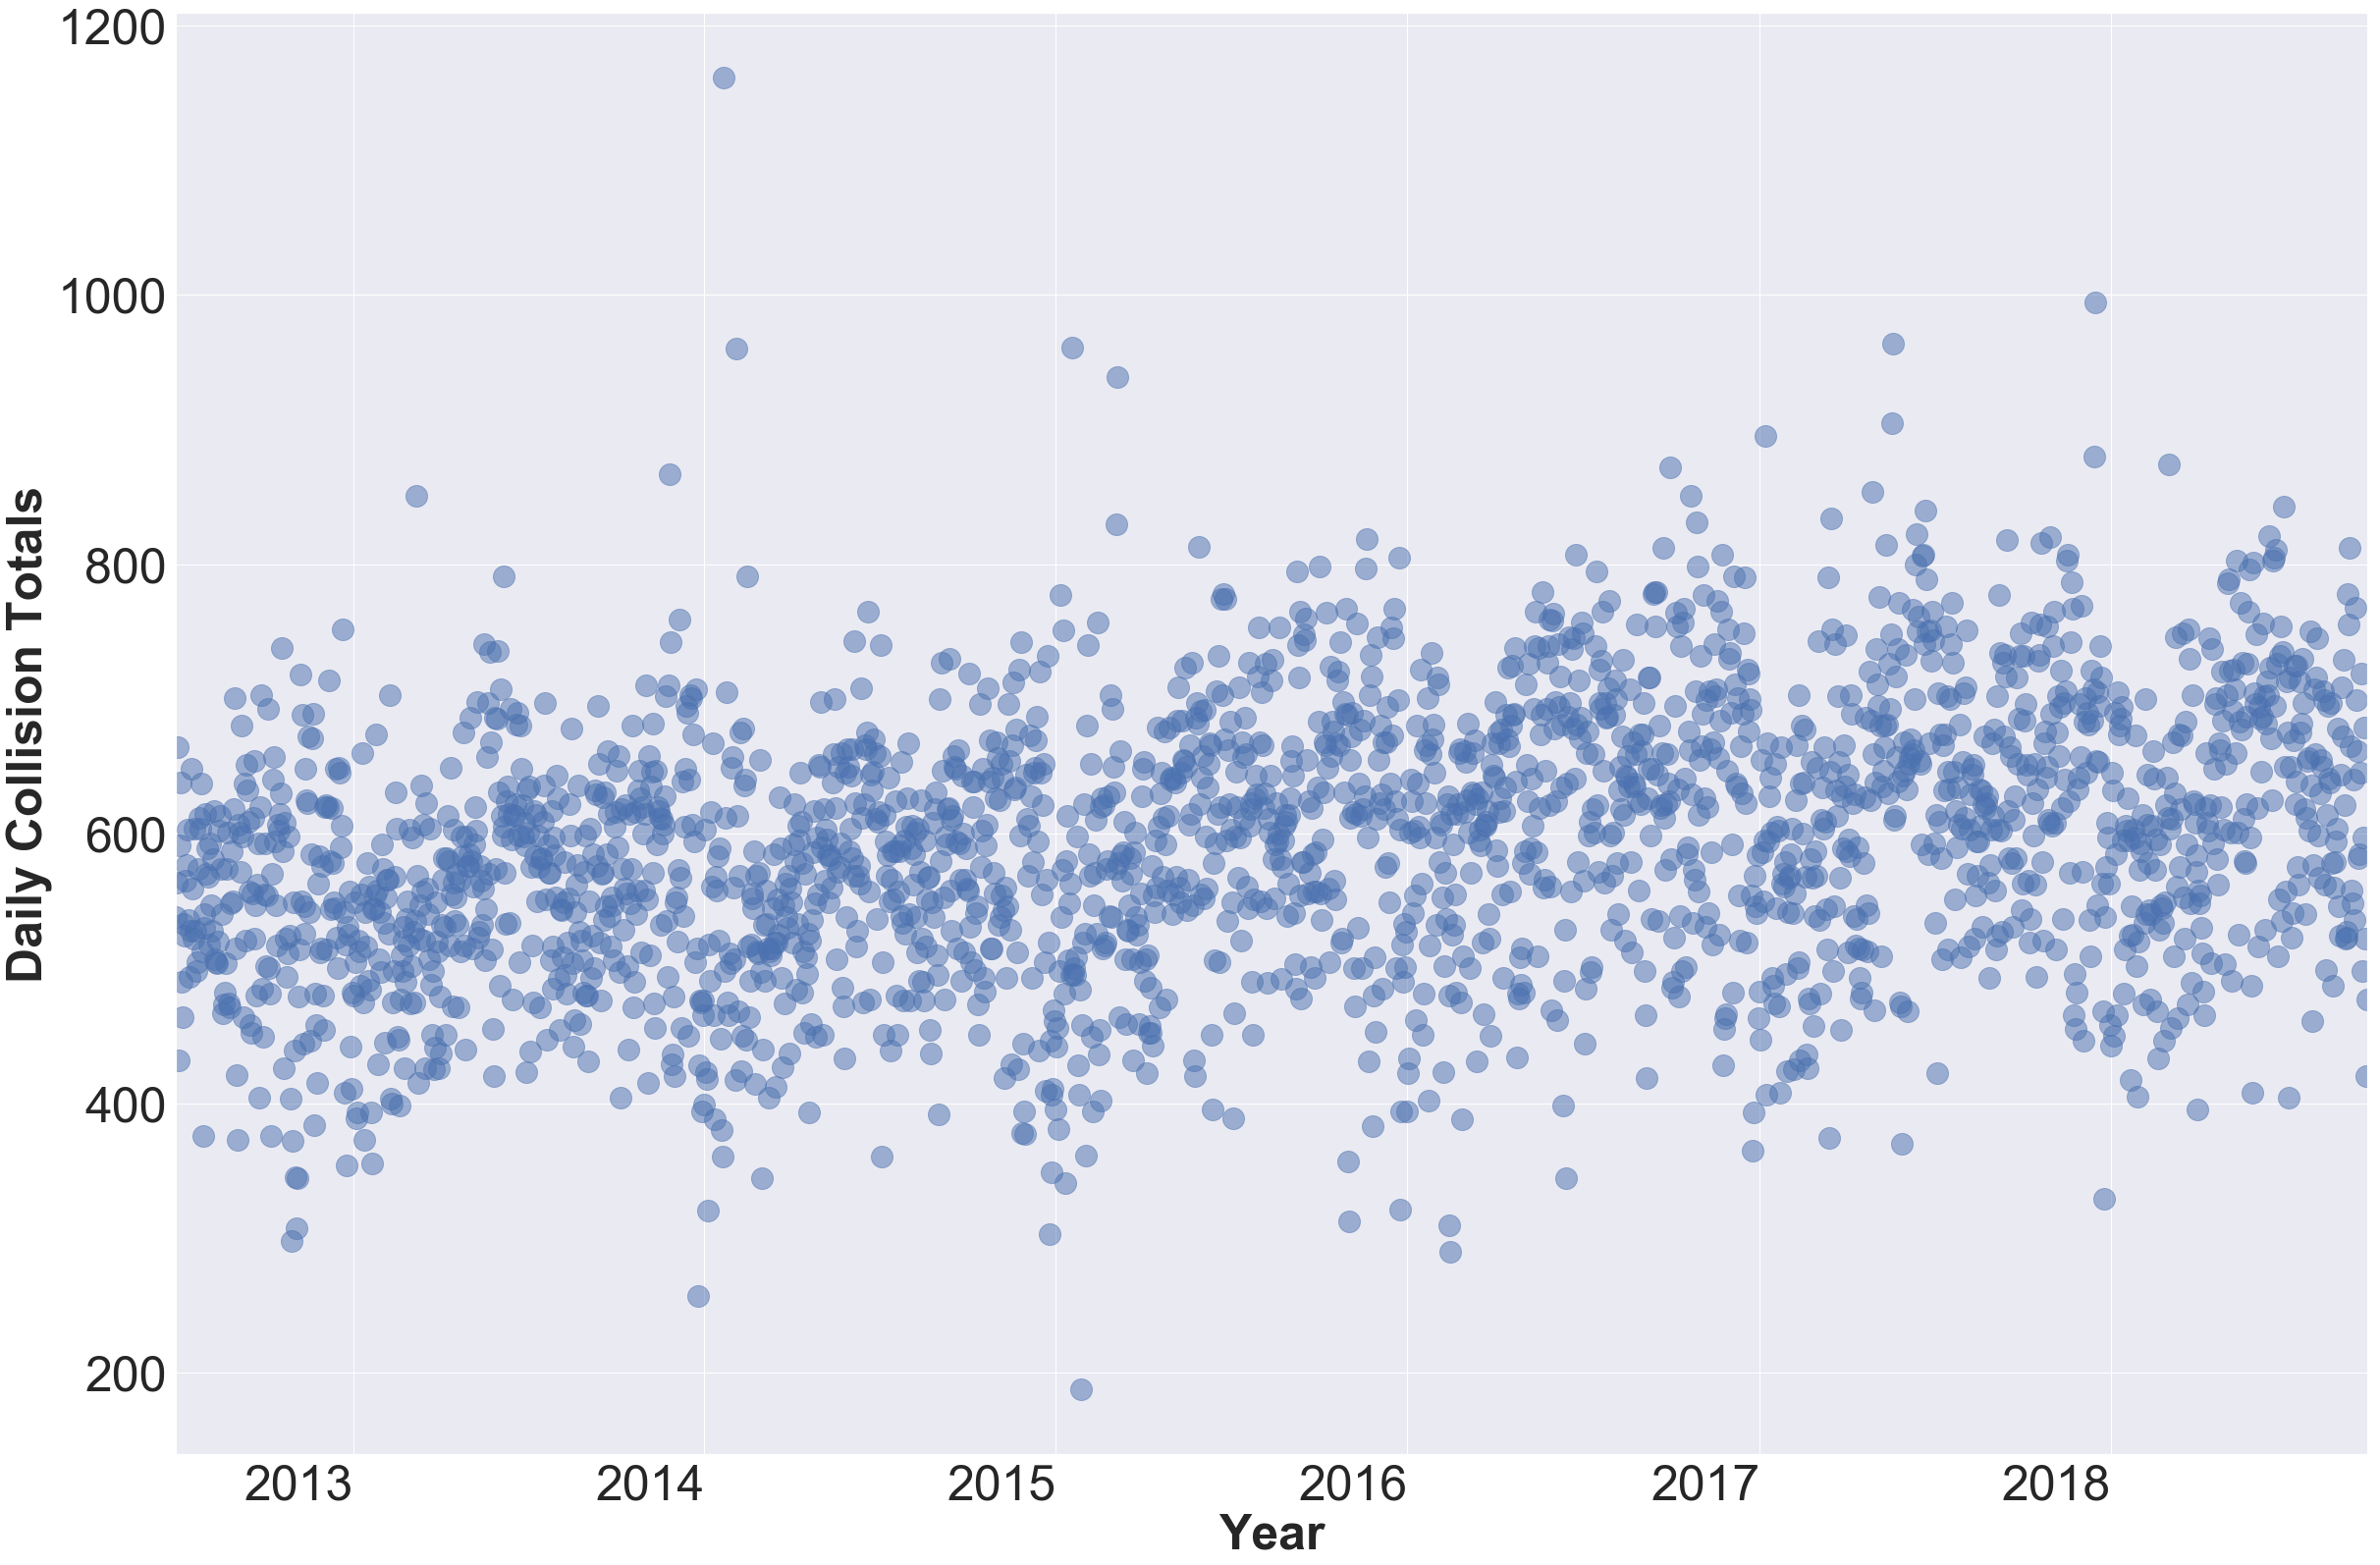

In [70]:
plt.rcParams['xtick.labelsize']=50
plt.rcParams['ytick.labelsize']=50

ax = collapsed_collisions_df['count'].plot(marker='o', alpha=0.5, markersize=22 , linestyle='None', figsize=(40,30), subplots=True)
plt.ylabel('Daily Collision Totals', fontsize=50,fontweight='bold')
plt.xlabel('Year', fontsize=50,fontweight='bold')
plt.xticks(rotation='horizontal')

#plt.savefig('dailycollisions.png')

plt.savefig('../manuscripts/dailycollisions.png', bbox_inches='tight')


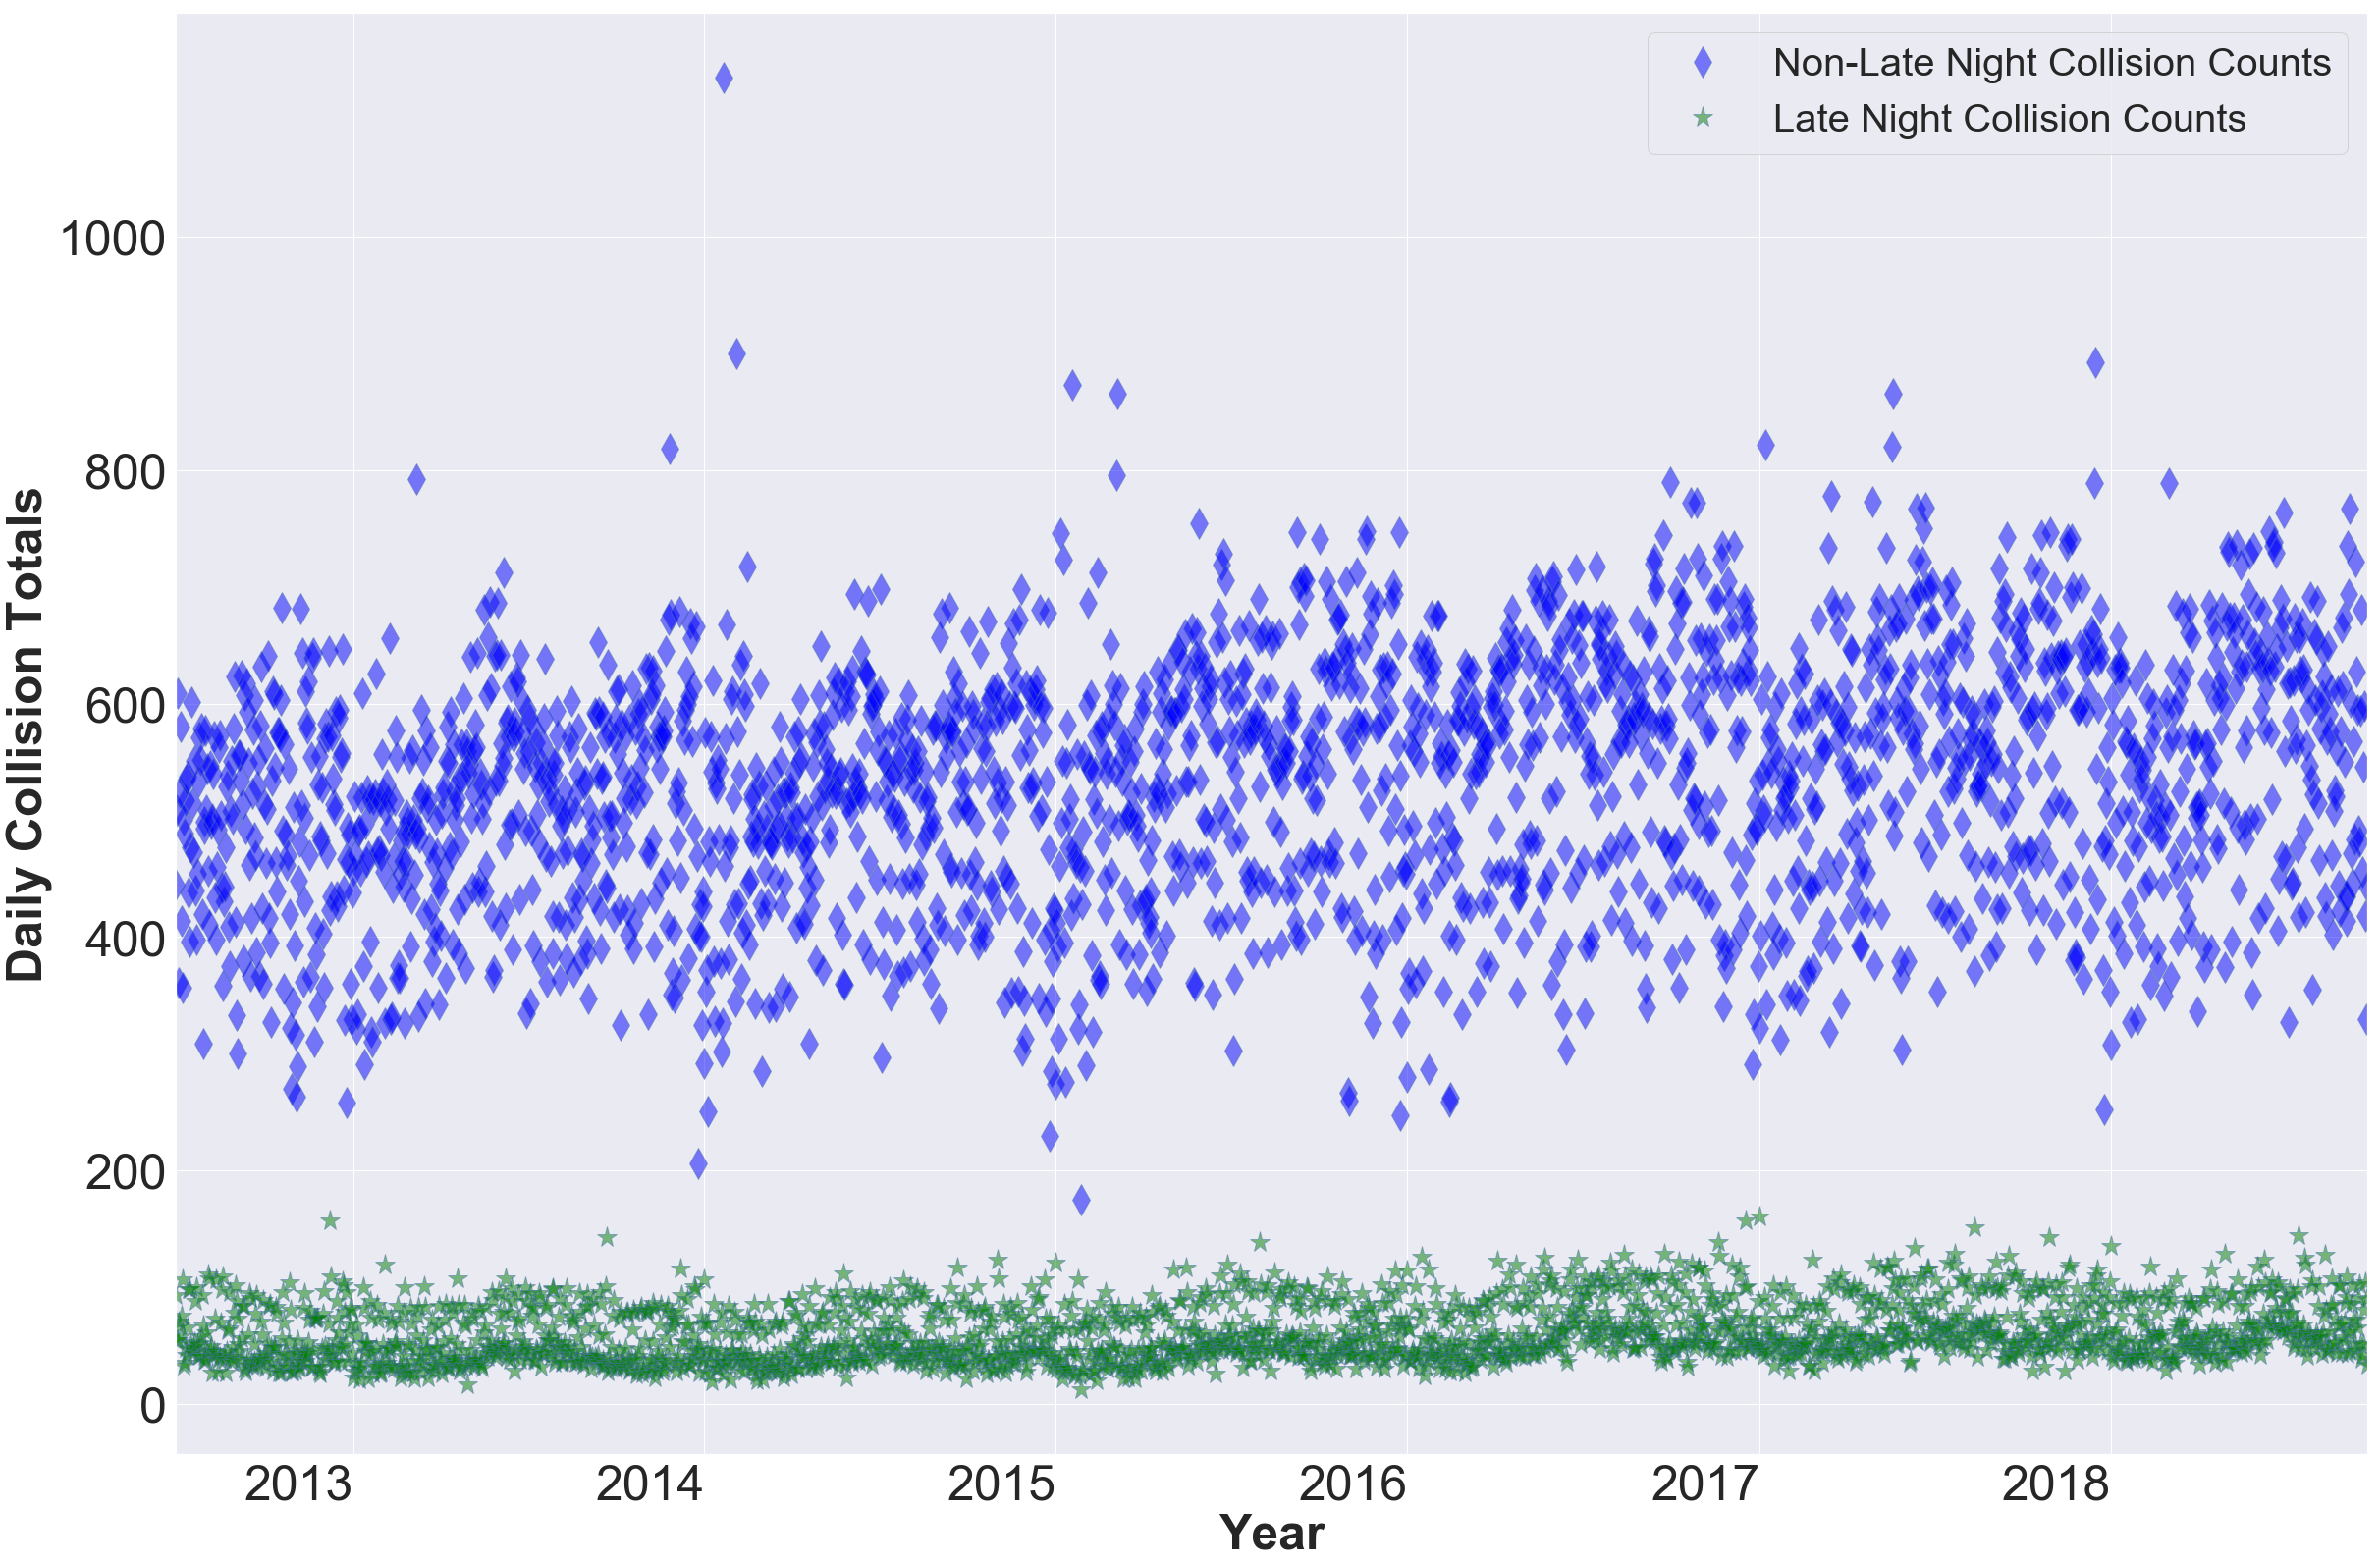

In [71]:
plt.rcParams['xtick.labelsize']=50
plt.rcParams['ytick.labelsize']=50

ax = collapsed_collisions_df['nonlatenight_count'].plot(marker='d',markerfacecolor='blue', alpha=0.5, markersize=22 , linestyle='None', figsize=(40,30), subplots=True)
ax = collapsed_collisions_df['latenight_count'].plot(marker='*',markerfacecolor='green', alpha=0.5, markersize=22 , linestyle='None', figsize=(40,30), subplots=True)

plt.ylabel('Daily Collision Totals', fontsize=50,fontweight='bold')
plt.xlabel('Year', fontsize=50,fontweight='bold')
plt.legend(('Non-Late Night Collision Counts','Late Night Collision Counts'), loc='upper right',prop={'size':40})
plt.xticks(rotation='horizontal')

plt.savefig('../manuscripts/dailycollisions_stratified.png', bbox_inches='tight')


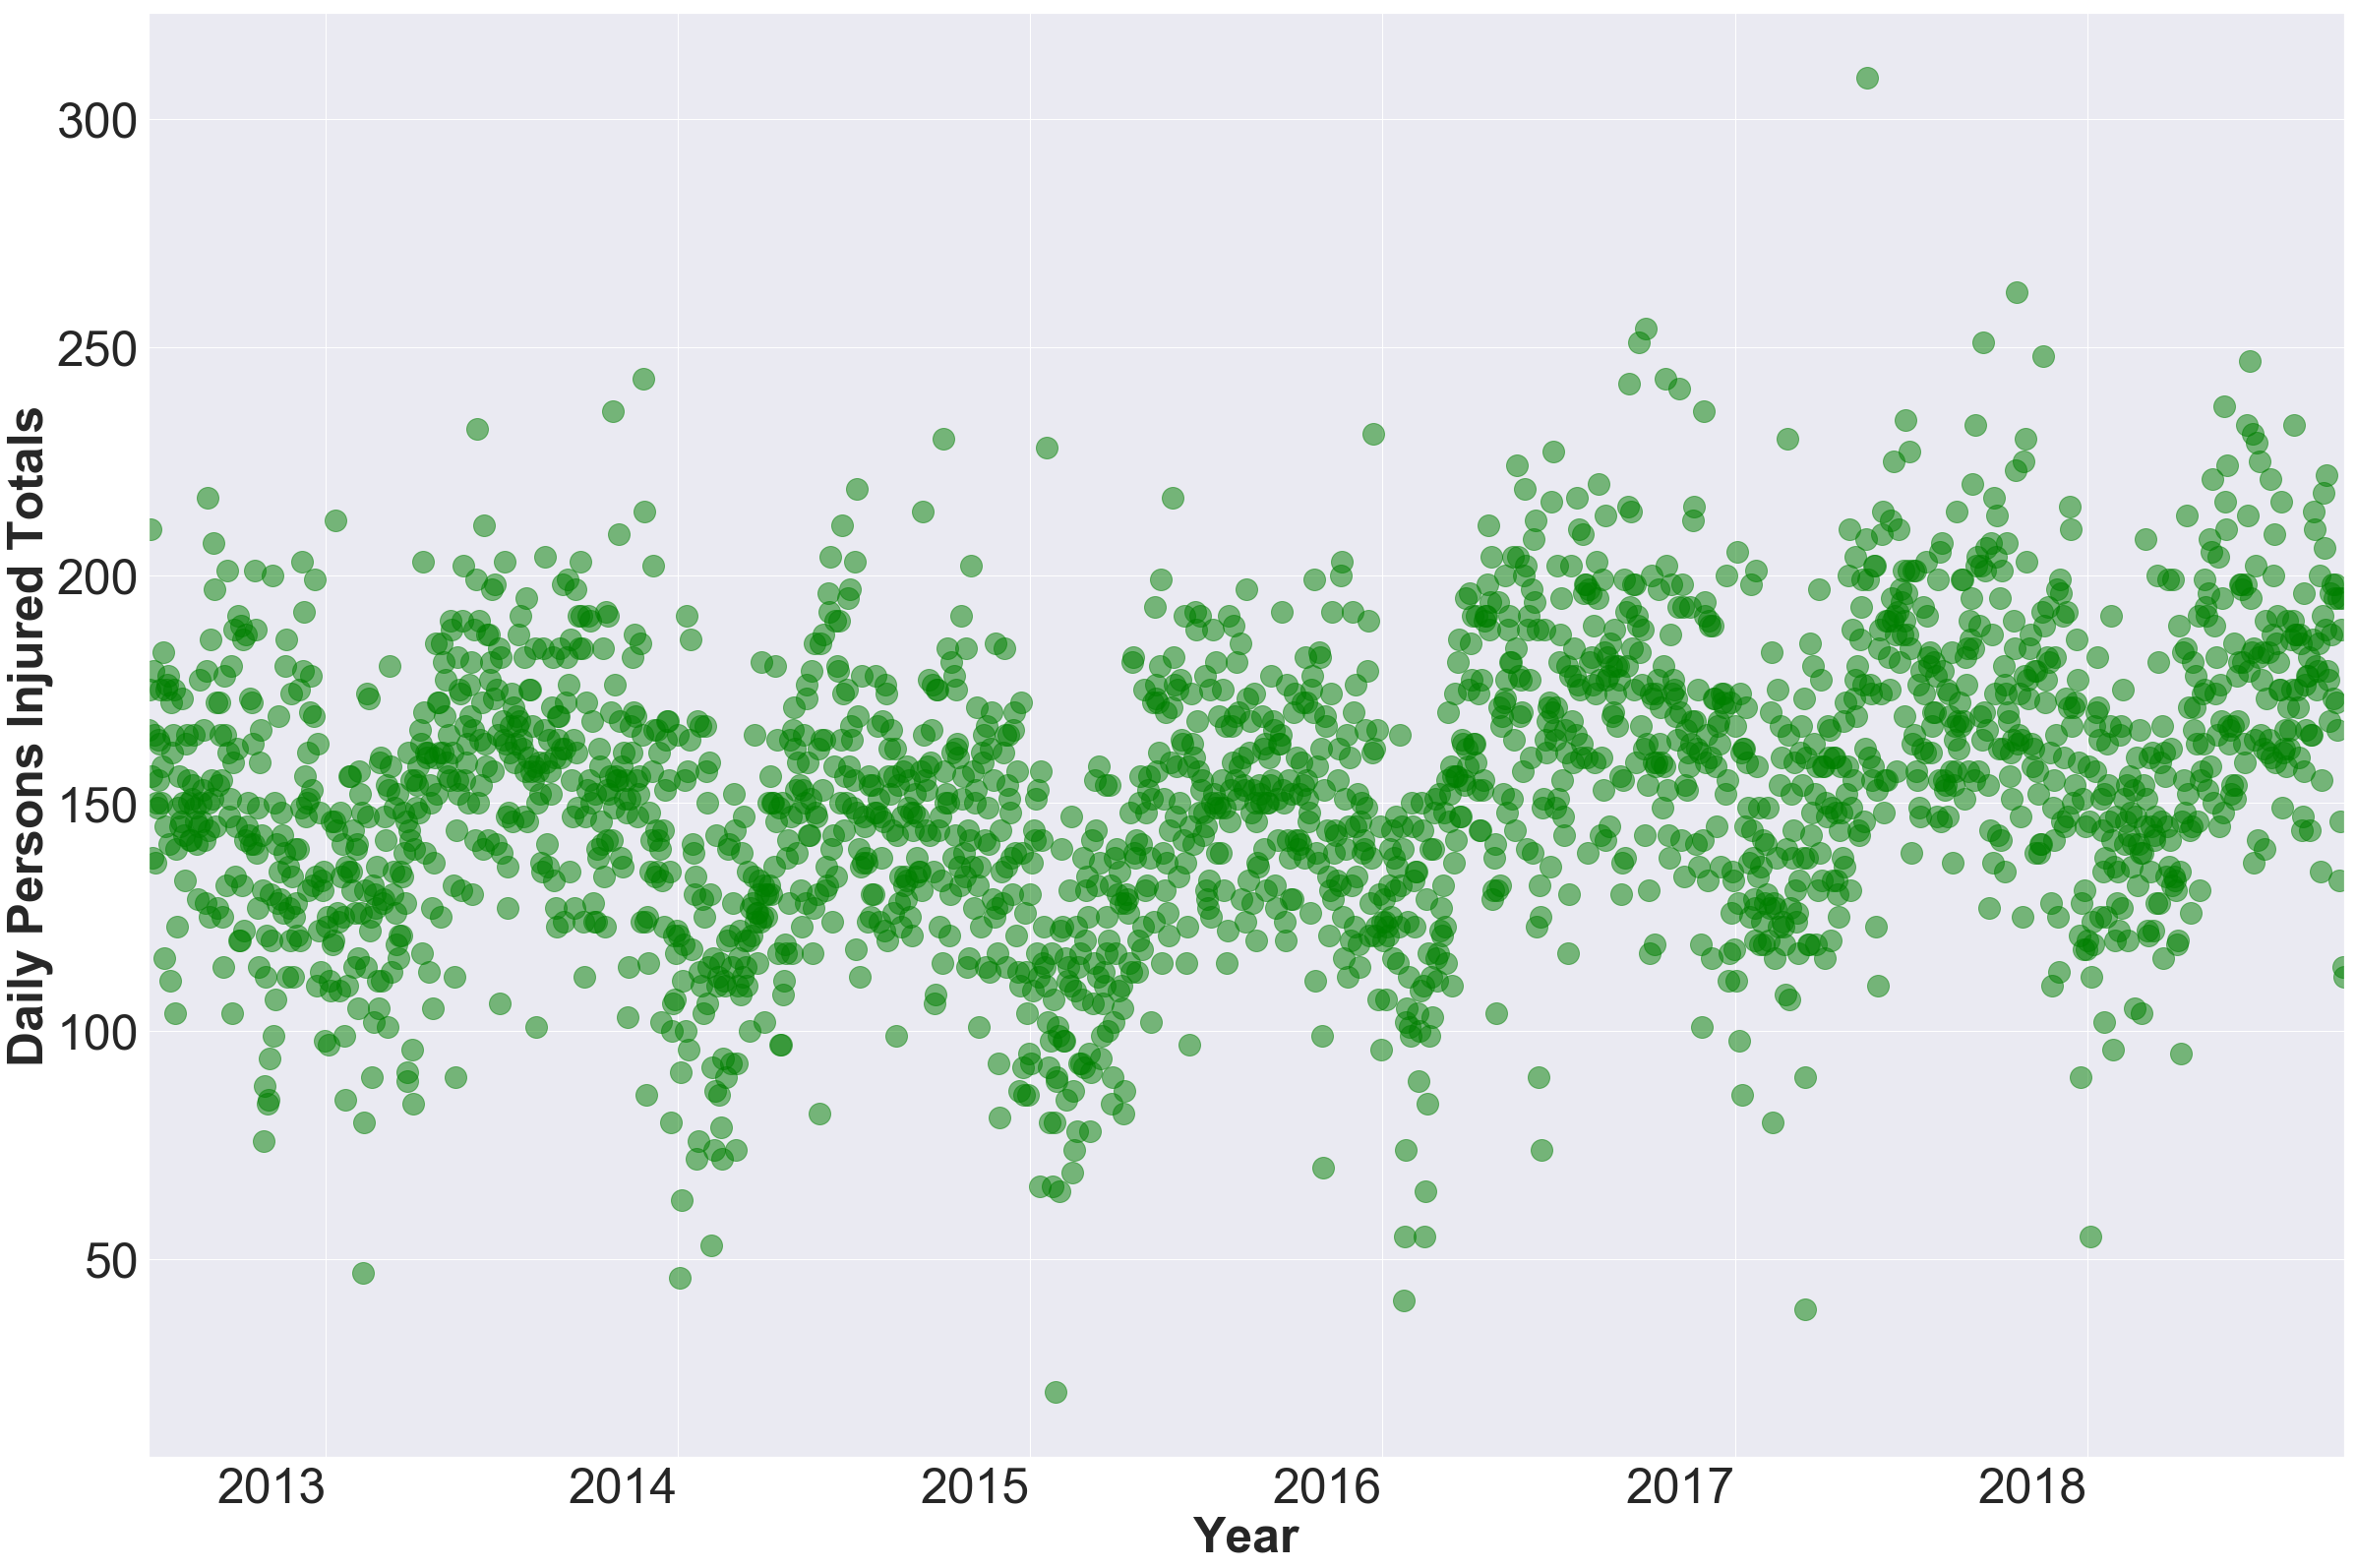

In [72]:
plt.rcParams['xtick.labelsize']=50
plt.rcParams['ytick.labelsize']=50

ax = collapsed_collisions_df['numberofpersonsinjured'].plot(marker='o', color='green', alpha=0.5, markersize=22 , linestyle='None', figsize=(40,30), subplots=True)

plt.ylabel('Daily Persons Injured Totals', fontsize=50,fontweight='bold')
plt.xlabel('Year', fontsize=50,fontweight='bold')
plt.xticks(rotation='horizontal')

plt.savefig('../manuscripts/dailypersonsinjuries.png', bbox_inches='tight')


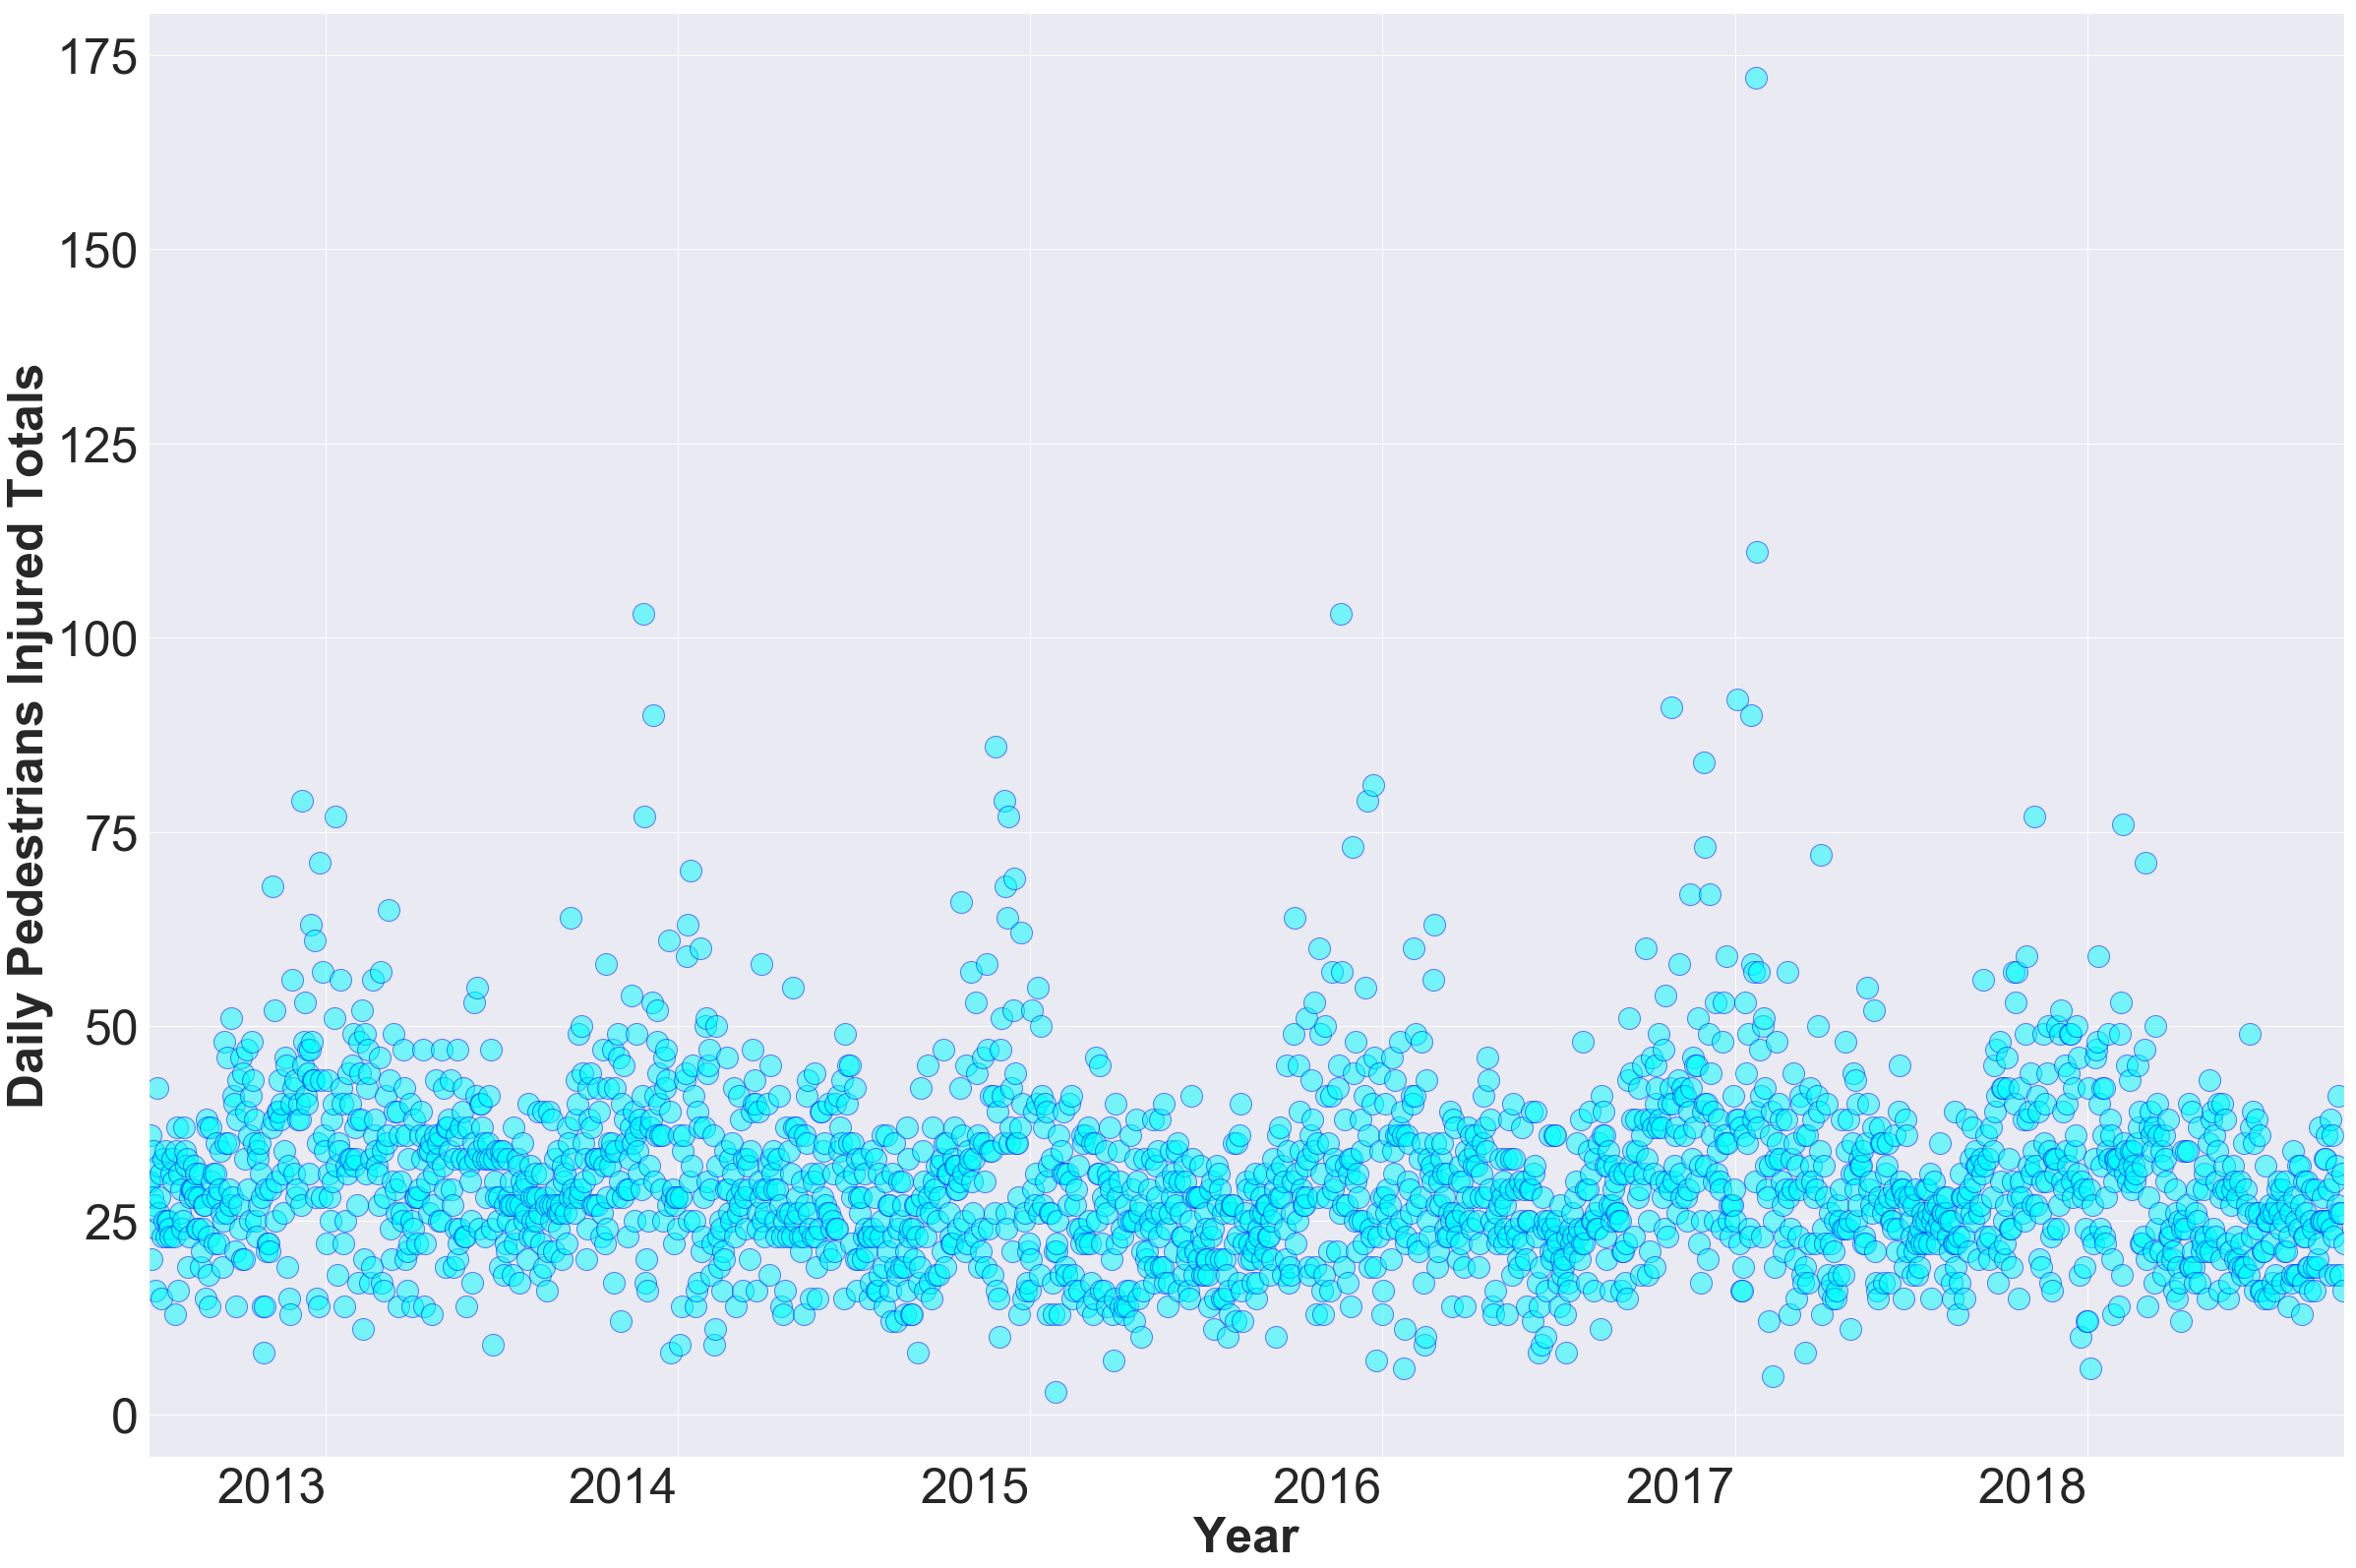

In [73]:
plt.rcParams['xtick.labelsize']=50
plt.rcParams['ytick.labelsize']=50

ax = collapsed_collisions_df['numberofpedestriansinjured'].plot(marker='o', color='cyan',markeredgecolor = 'blue', alpha=0.5, markersize=22 , linestyle='None', figsize=(40,30), subplots=True)

plt.ylabel('Daily Pedestrians Injured Totals', fontsize=50,fontweight='bold')
plt.xlabel('Year', fontsize=50,fontweight='bold')
plt.xticks(rotation='horizontal')

plt.savefig('../manuscripts/dailypedestriansinjuries.png', bbox_inches='tight')

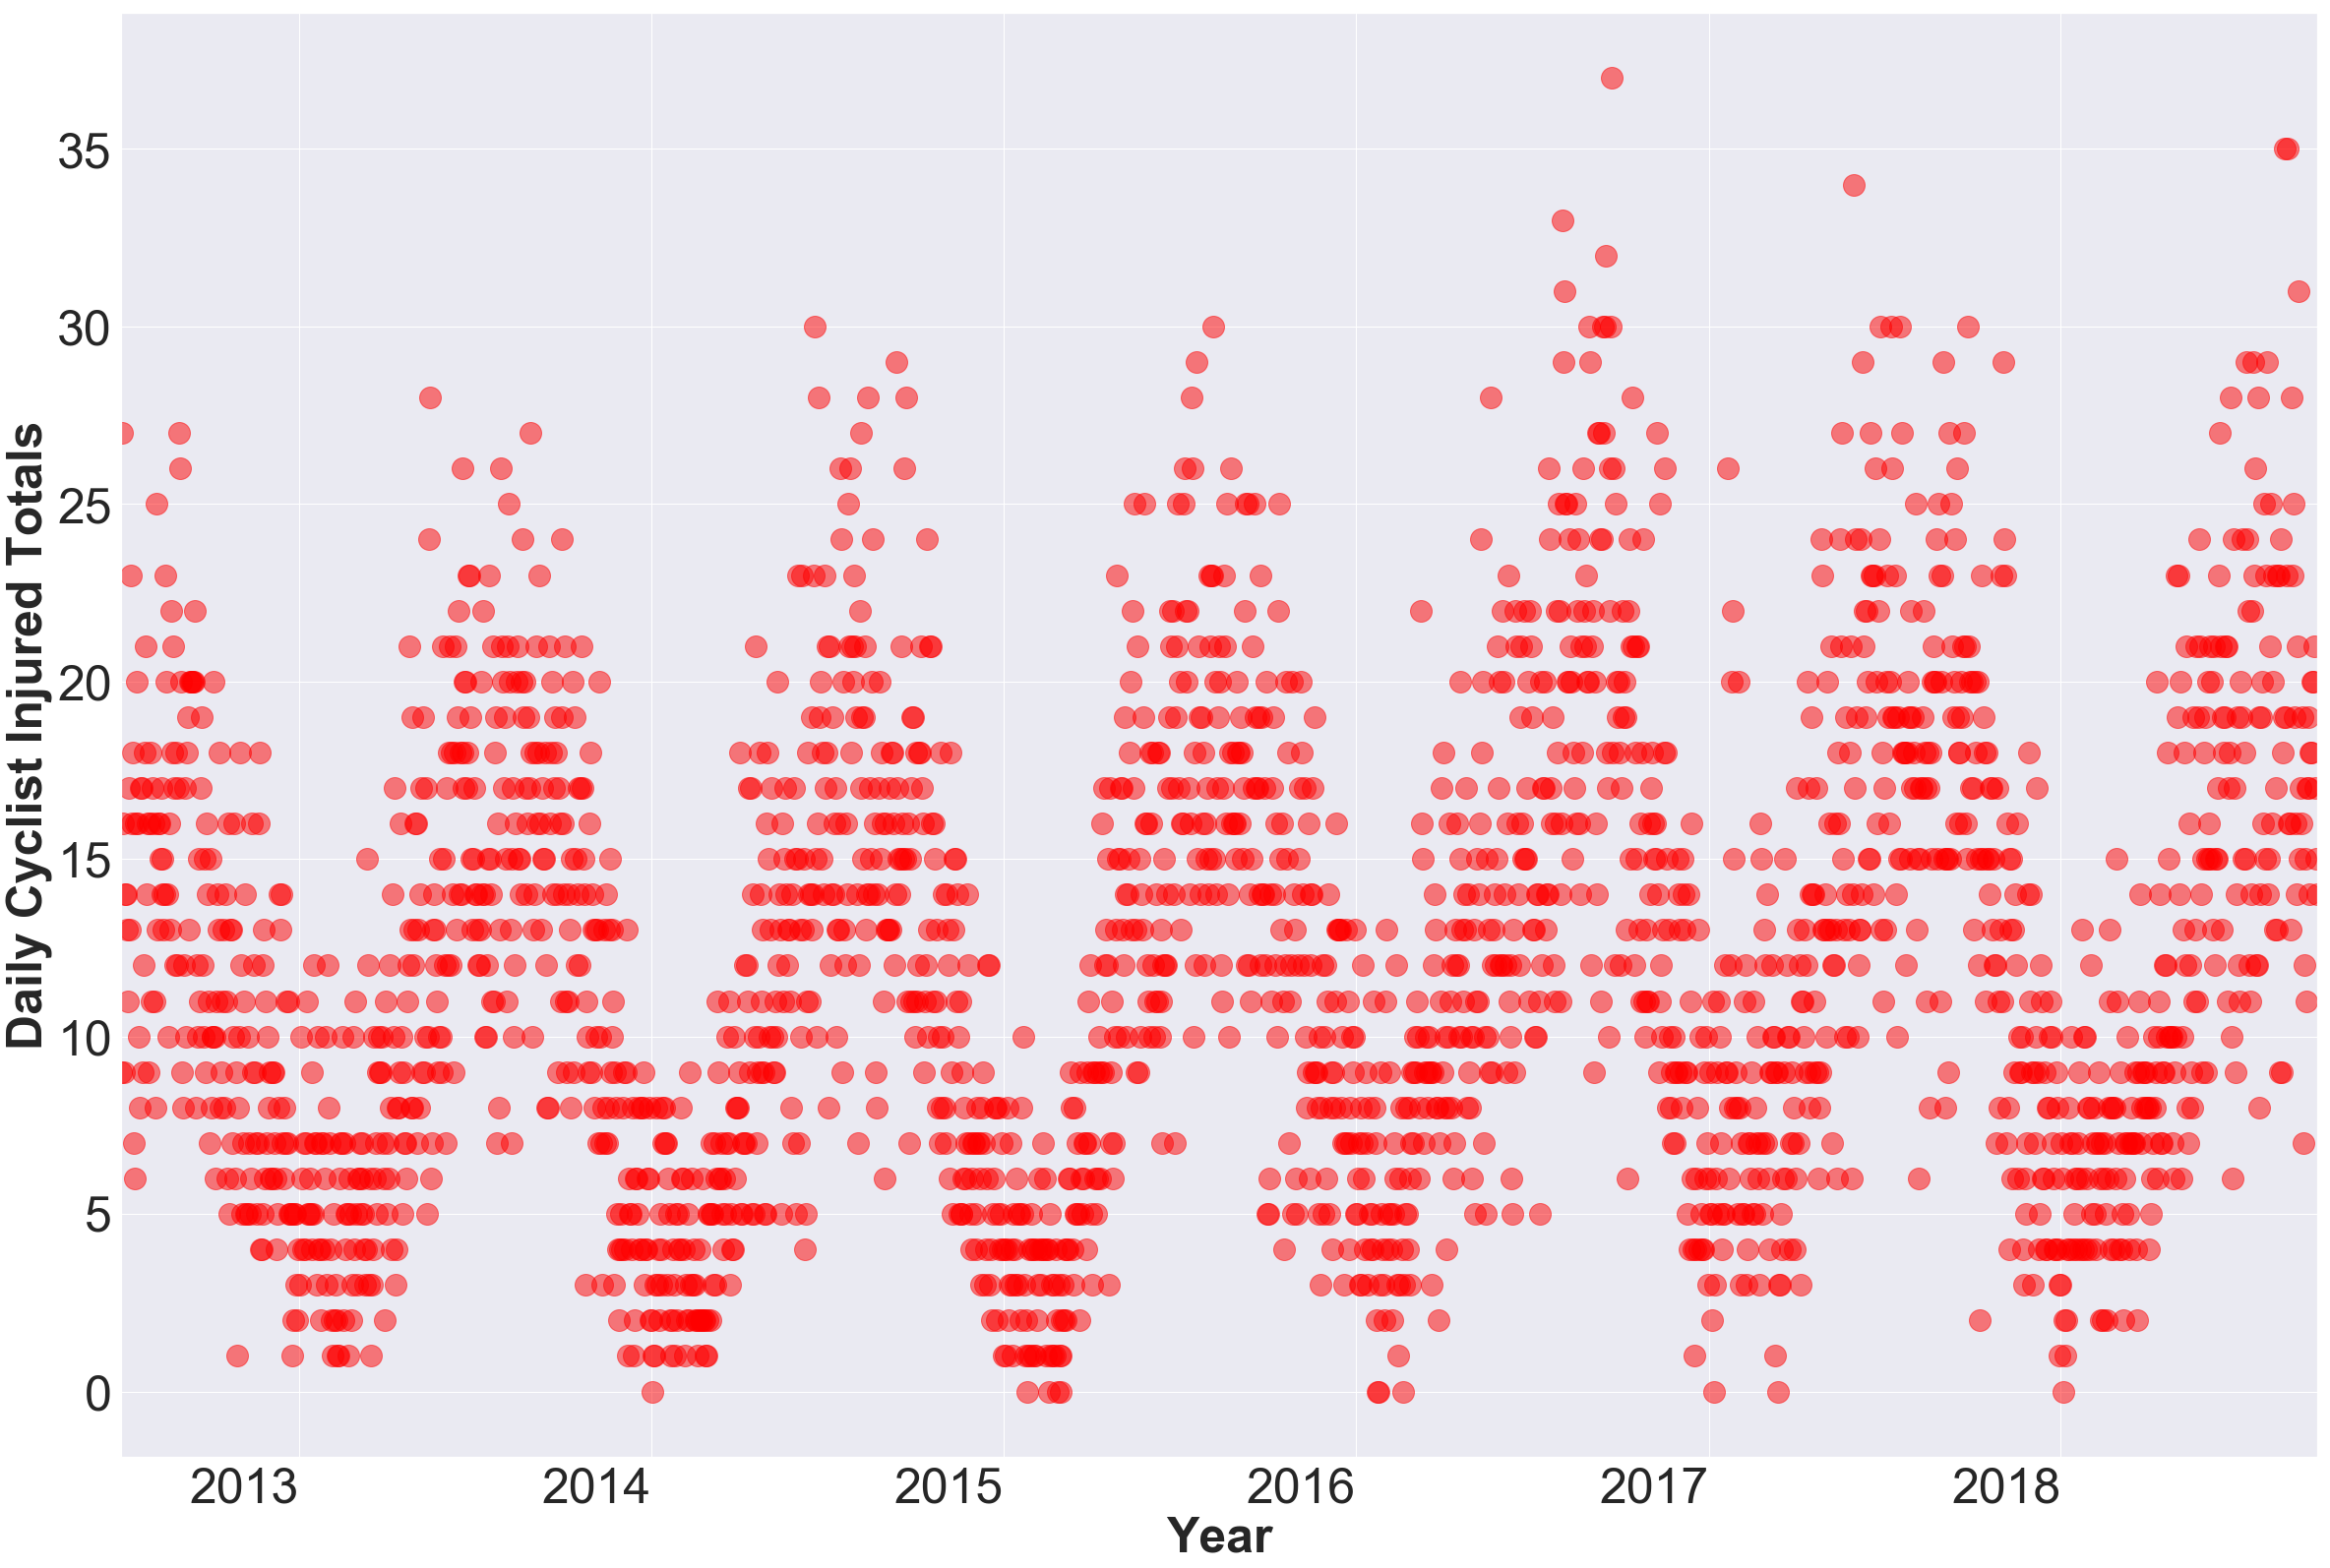

In [74]:
plt.rcParams['xtick.labelsize']=50
plt.rcParams['ytick.labelsize']=50

ax = collapsed_collisions_df['numberofcyclistinjured'].plot(marker='o', color='red', alpha=0.5, markersize=22 , linestyle='None', figsize=(40,30), subplots=True)

plt.ylabel('Daily Cyclist Injured Totals', fontsize=50,fontweight='bold')
plt.xlabel('Year', fontsize=50,fontweight='bold')
plt.xticks(rotation='horizontal')

plt.savefig('../manuscripts/dailycyclistinjuries.png', bbox_inches='tight')

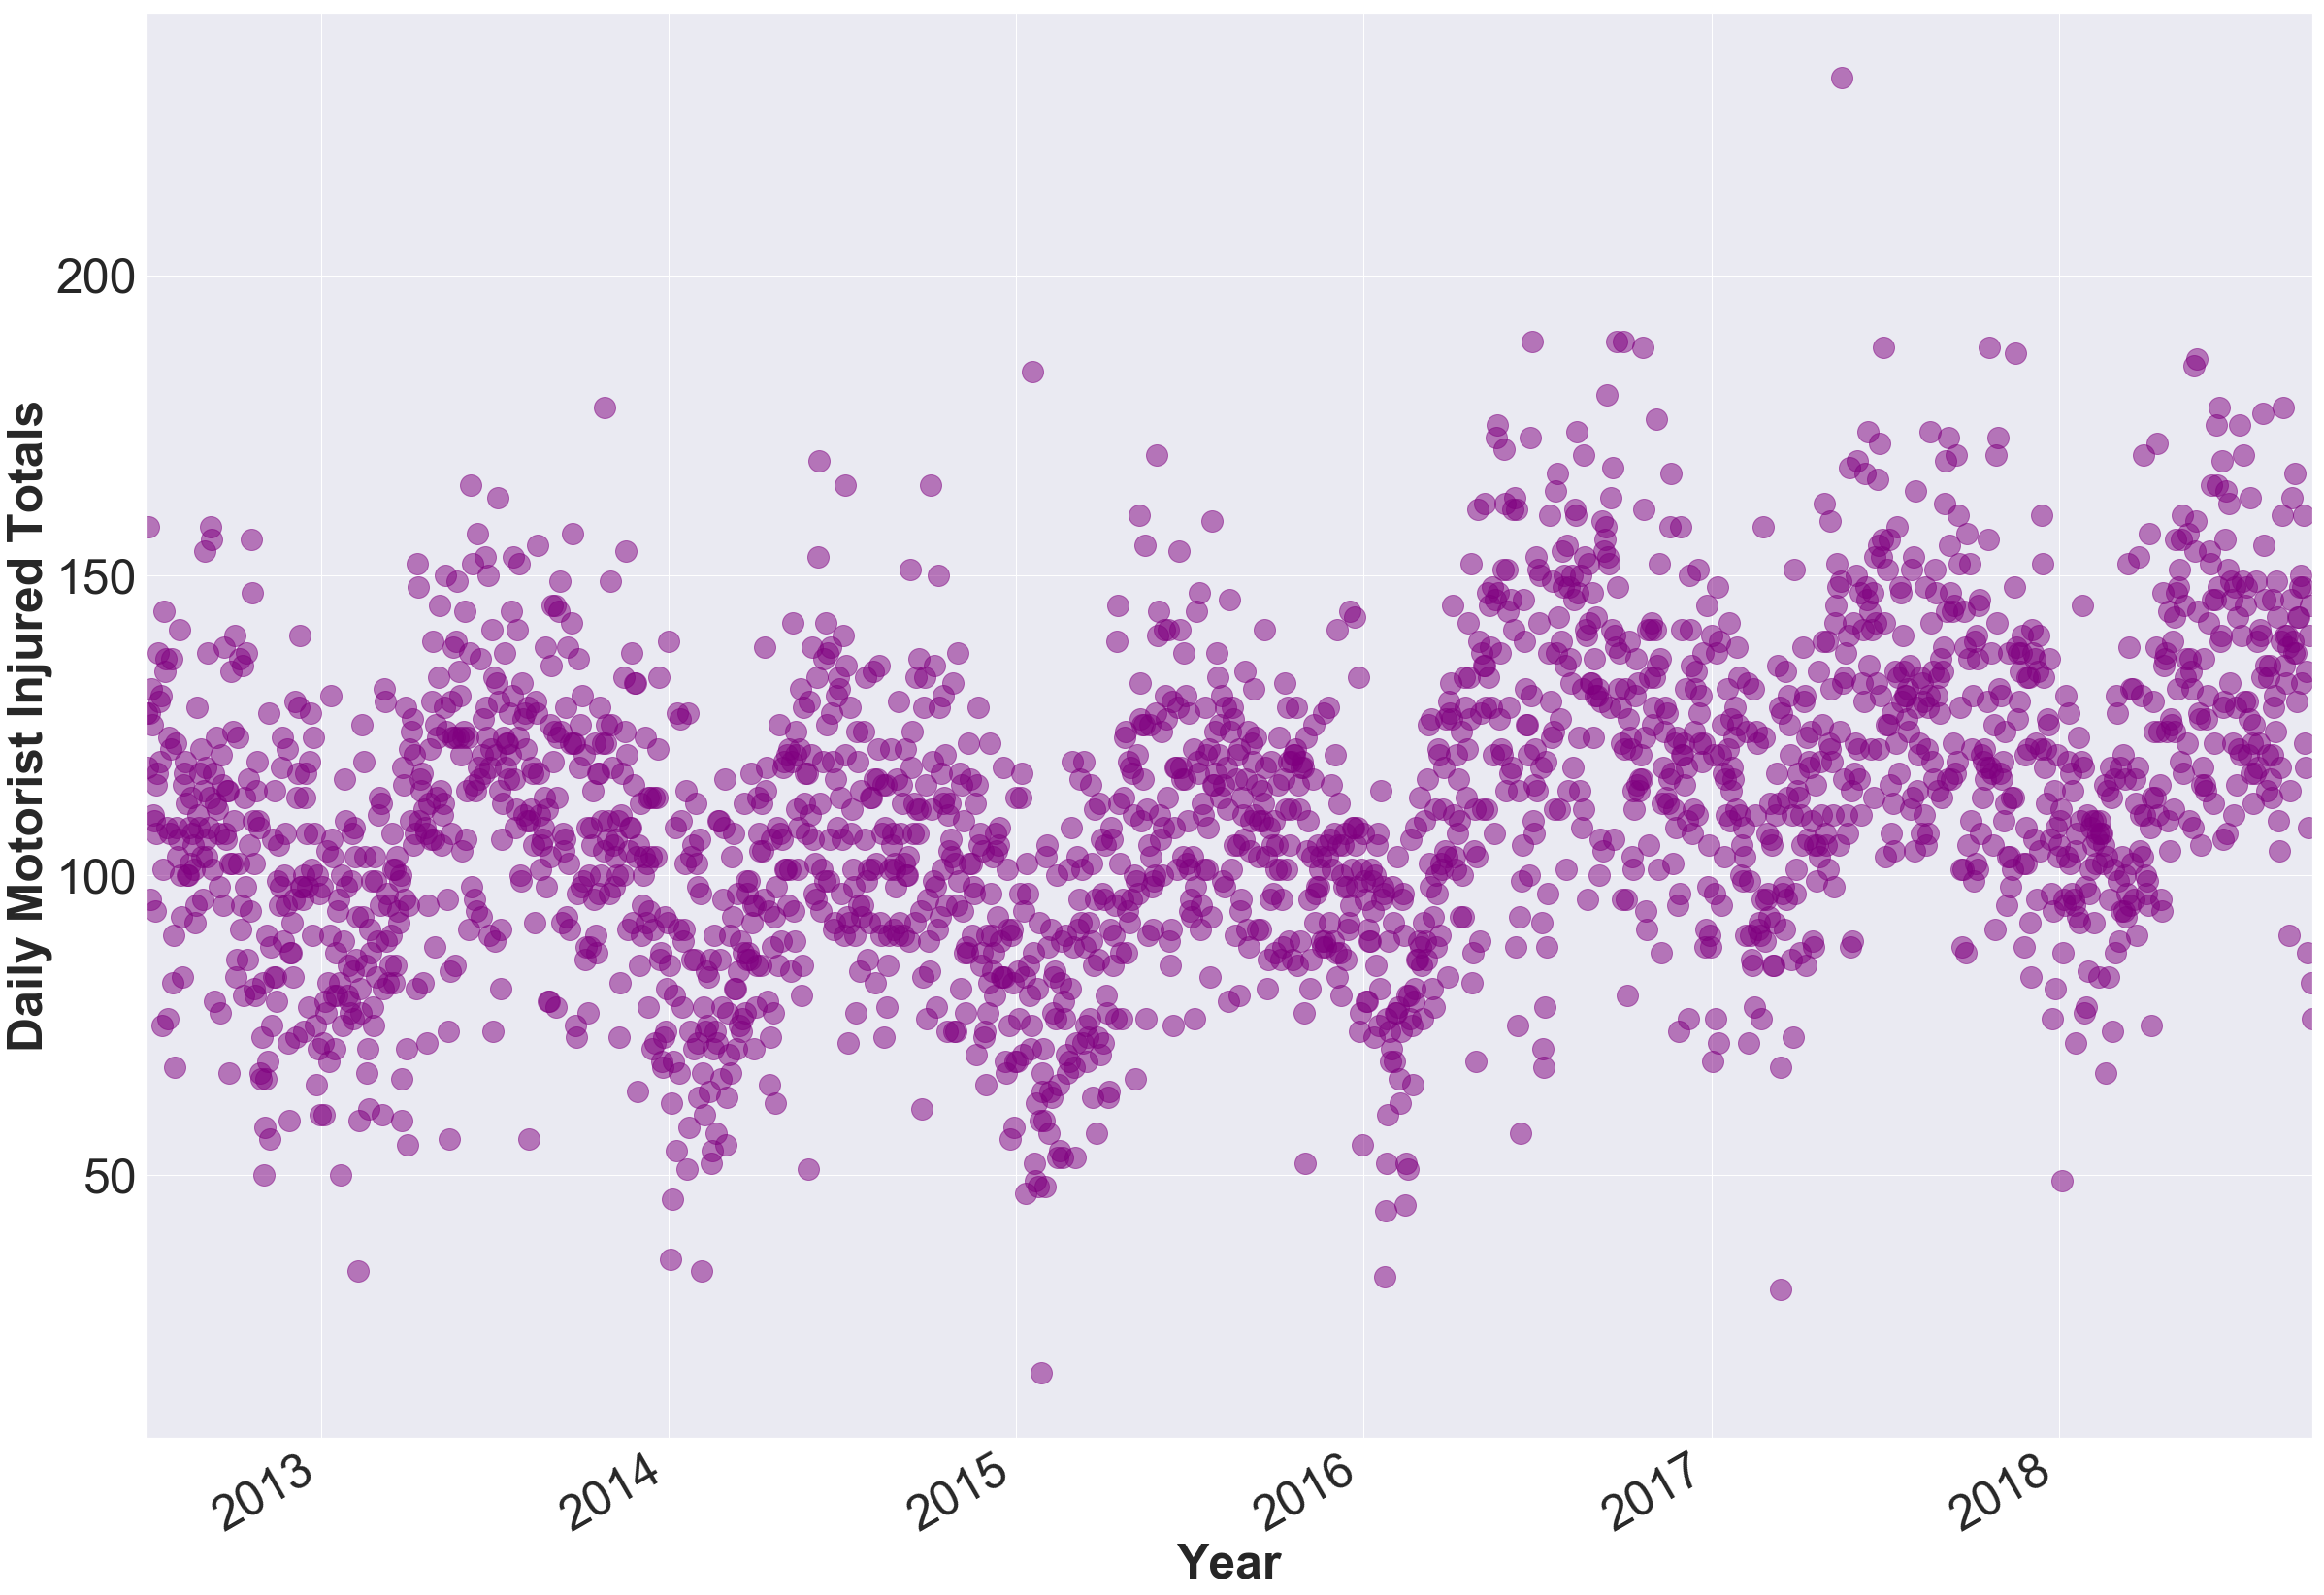

In [59]:
plt.rcParams['xtick.labelsize']=50
plt.rcParams['ytick.labelsize']=50

ax = collapsed_collisions_df['numberofmotoristinjured'].plot(marker='o', color='purple', alpha=0.5, markersize=22 , linestyle='None', figsize=(40,30), subplots=True)

plt.ylabel('Daily Motorist Injured Totals', fontsize=50,fontweight='bold')
plt.xlabel('Year', fontsize=50,fontweight='bold')

plt.savefig('../manuscripts/dailymotoristinjuries.png', bbox_inches='tight')

In [ ]:
plt.rcParams['xtick.labelsize']=50
plt.rcParams['ytick.labelsize']=50

ax = collapsed_collisions_df['count'].plot(marker='o', alpha=0.5, markersize=22 , linestyle='None', figsize=(40,30), subplots=True)
ax = collapsed_collisions_df['numberofpersonsinjured'].plot(marker='o', color='green', alpha=0.5, markersize=22 , linestyle='None', figsize=(40,30), subplots=True)
ax = collapsed_collisions_df['numberofpedestriansinjured'].plot(marker='o', color='cyan', alpha=0.5, markersize=22 , linestyle='None', figsize=(40,30), subplots=True)
ax = collapsed_collisions_df['numberofcyclistinjured'].plot(marker='o', color='red', alpha=0.5, markersize=22 , linestyle='None', figsize=(40,30), subplots=True)
ax = collapsed_collisions_df['numberofmotoristinjured'].plot(marker='o', color='purple', alpha=0.5, markersize=22 , linestyle='None', figsize=(40,30), subplots=True)

plt.ylabel('Daily Totals', fontsize=50,fontweight='bold')
plt.xlabel('Year', fontsize=50,fontweight='bold')
plt.xticks(rotation='horizontal')

plt.legend(('Collisions','Persons injured', 'Pedestrians injured', 'Cyclist injured', 'Motorist injured'), loc='upper right',prop={'size':40})
plt.savefig('../manuscripts/dailyall.png', bbox_inches='tight')